In [1]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

from HistoricalData import HistoricalData
from OrderStatus import OrderStatus

import matplotlib.pyplot as plt 

import mplfinance as fplt

import matplotlib.dates as mpl_dates

import pandas as pd
import numpy as np
import pandas_ta as ta



In [2]:
def saveDataToCSV(symbol,timeframe='5m',higher_timeframe='30m',start_str='1 year ago UTC'):
    timeframe_pastData = HistoricalData.getHistoricalData('BINANCE',symbol,interval=timeframe,
                                                         start_str=start_str)
    
    path1 = './data/SMA/'+symbol+'_'+timeframe+'.csv'
    print("Saving Data to "+path1)
    
    timeframe_pastData.to_csv(path1,index=False)
    
    highertimeframe_pastData = HistoricalData.getHistoricalData('BINANCE',symbol,interval=higher_timeframe,
                                                         start_str=start_str)
    
    path2 = './data/SMA/'+symbol+'_'+higher_timeframe+'.csv'
    print("Saving Data to "+path2)
    
    highertimeframe_pastData.to_csv(path2,index=False)

In [3]:
symbol = 'BTCUSDT'

timeframe='5m'
higher_timeframe='30m'

lower_sma_interval = 22
higher_sma_interval = 55

sma_macd_interval = 13

atr_len = 10
filter_ma_interval = 200

path1 = './data/SMA/'+symbol+'_'+timeframe+'.csv'
path2 = './data/SMA/'+symbol+'_'+higher_timeframe+'.csv'
# saveDataToCSV(symbol)

In [4]:
dataframe_low = pd.read_csv(path1)
dataframe_high = pd.read_csv(path2)

In [5]:
dataframe_low.head(1)

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,buy_quote_asset_volume,ignore
0,2020-01-03 14:50:00,7264.51,7271.87,7260.0,7261.55,96.949582,1578063299999,704328.630411,1057,50.211959,364805.127418,0


In [6]:
dataframe_high.tail(1)

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,buy_quote_asset_volume,ignore
17527,2021-01-03 14:30:00,33927.0,34078.53,33700.0,33700.01,1695.367024,1609685999999,5.743644e+07,36298,775.499748,2.628022e+07,0


In [7]:
startTimeStamp = dataframe_high.head(1).timestamp.item()
endTimeStamp = dataframe_high.tail(1).timestamp.item()

In [8]:
dataframe_low = dataframe_low[(dataframe_low.timestamp>=startTimeStamp) 
                              & (endTimeStamp>=dataframe_low.timestamp)]
dataframe_low = dataframe_low.reset_index(drop=True)

In [9]:
dataframe_low['SMA_Low'] = ta.sma(dataframe_low.close,length=lower_sma_interval)
dataframe_low['SMA_High'] = ta.sma(dataframe_low.close,length=higher_sma_interval)

ohlc_dataframe_low = ta.ohlc4(dataframe_low.open,dataframe_low.high,
                             dataframe_low.low,dataframe_low.close)

dataframe_low['MACD_EMA_Low'] = ta.ema(ohlc_dataframe_low,length=lower_sma_interval)
dataframe_low['MACD_EMA_High'] = ta.ema(ohlc_dataframe_low,length=higher_sma_interval)

dataframe_low['MACD'] = dataframe_low['MACD_EMA_High'] - dataframe_low['MACD_EMA_Low']

dataframe_low['MACD_Signal'] = ta.sma(dataframe_low.MACD,length=sma_macd_interval)

dataframe_low['EMA'] = ta.ema(ohlc_dataframe_low,length=filter_ma_interval)
dataframe_low['ATR'] = ta.atr(dataframe_low.high, dataframe_low.low, dataframe_low.close, length=atr_len)
dataframe_low['EMA_Dev'] = dataframe_low.EMA.rolling(22).std()

dataframe_low = dataframe_low.dropna().reset_index(drop=True)



dataframe_low

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,...,ignore,SMA_Low,SMA_High,MACD_EMA_Low,MACD_EMA_High,MACD,MACD_Signal,EMA,ATR,EMA_Dev
0,2020-01-04 09:20:00,7343.78,7348.61,7341.57,7344.41,82.276232,1578129899999,6.042246e+05,960,60.240675,...,0,7344.980909,7346.107091,7346.136369,7342.771970,-3.364399,-4.159103,7328.826880,8.952729,1.256204
1,2020-01-04 09:25:00,7344.73,7349.00,7342.89,7347.84,62.733322,1578130199999,4.609180e+05,736,40.011367,...,0,7345.421818,7346.357818,7346.134511,7342.891364,-3.243147,-4.120084,7328.998901,8.668456,1.262699
2,2020-01-04 09:30:00,7347.73,7349.79,7344.28,7348.68,70.581271,1578130499999,5.185696e+05,816,46.676741,...,0,7346.050455,7346.609091,7346.263684,7343.060244,-3.203440,-4.082749,7329.184186,8.352611,1.264602
3,2020-01-04 09:35:00,7348.39,7352.53,7345.99,7351.22,124.887371,1578130799999,9.178605e+05,965,73.425427,...,0,7346.374545,7346.994727,7346.547928,7343.291396,-3.256533,-4.039318,7329.386656,8.171350,1.264841
4,2020-01-04 09:40:00,7351.22,7358.46,7349.17,7355.76,80.819810,1578131099999,5.942286e+05,692,48.524451,...,0,7346.895909,7347.451636,7347.165717,7343.661435,-3.504282,-3.983628,7329.628108,8.283215,1.269670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104929,2021-01-03 14:10:00,34048.69,34070.48,33980.44,34048.36,305.252712,1609683299999,1.038270e+07,6019,167.692614,...,0,34102.911818,34098.677818,34077.590773,34088.003737,10.412964,-36.625611,33402.846261,192.122549,51.164788
104930,2021-01-03 14:15:00,34048.35,34111.89,34000.00,34018.13,341.227211,1609683599999,1.162270e+07,6014,191.396651,...,0,34090.470000,34097.811091,34074.721358,34086.453335,11.731978,-30.314922,33409.231796,184.099294,50.000311
104931,2021-01-03 14:20:00,34018.13,34150.00,34018.13,34042.79,338.600072,1609683899999,1.154724e+07,7105,158.557774,...,0,34088.070455,34096.199636,34073.203196,34085.410806,12.207609,-23.666052,33415.679863,178.876365,48.889040
104932,2021-01-03 14:25:00,34042.79,34064.17,33926.96,33926.99,403.285429,1609684199999,1.371424e+07,8839,197.512191,...,0,34077.571818,34093.098364,34065.987918,34082.011402,16.023483,-16.799153,33421.396755,174.709728,47.704594


In [10]:
dataframe_high['SMA_Low'] = ta.sma(dataframe_high.close,length=lower_sma_interval)
dataframe_high['SMA_High'] = ta.sma(dataframe_high.close,length=higher_sma_interval)
ohlc_dataframe_high = ta.ohlc4(dataframe_high.open,dataframe_high.high,
                             dataframe_high.low,dataframe_high.close)

dataframe_high['MACD_EMA_Low'] = ta.ema(ohlc_dataframe_high,length=lower_sma_interval)
dataframe_high['MACD_EMA_High'] = ta.ema(ohlc_dataframe_high,length=higher_sma_interval)

dataframe_high['MACD'] = dataframe_high['MACD_EMA_High'] - dataframe_high['MACD_EMA_Low']

dataframe_high['MACD_Signal'] = ta.sma(dataframe_high.MACD,length=sma_macd_interval)
dataframe_high['EMA'] = ta.ema(ohlc_dataframe_high,length=filter_ma_interval)
dataframe_high['ATR'] = ta.atr(dataframe_high.high, dataframe_high.low, dataframe_high.close, length=atr_len)
dataframe_high['EMA_Dev'] = dataframe_high.EMA.rolling(22).std()

dataframe_high = dataframe_high.dropna().reset_index(drop=True)

In [11]:
dataframe_low

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,...,ignore,SMA_Low,SMA_High,MACD_EMA_Low,MACD_EMA_High,MACD,MACD_Signal,EMA,ATR,EMA_Dev
0,2020-01-04 09:20:00,7343.78,7348.61,7341.57,7344.41,82.276232,1578129899999,6.042246e+05,960,60.240675,...,0,7344.980909,7346.107091,7346.136369,7342.771970,-3.364399,-4.159103,7328.826880,8.952729,1.256204
1,2020-01-04 09:25:00,7344.73,7349.00,7342.89,7347.84,62.733322,1578130199999,4.609180e+05,736,40.011367,...,0,7345.421818,7346.357818,7346.134511,7342.891364,-3.243147,-4.120084,7328.998901,8.668456,1.262699
2,2020-01-04 09:30:00,7347.73,7349.79,7344.28,7348.68,70.581271,1578130499999,5.185696e+05,816,46.676741,...,0,7346.050455,7346.609091,7346.263684,7343.060244,-3.203440,-4.082749,7329.184186,8.352611,1.264602
3,2020-01-04 09:35:00,7348.39,7352.53,7345.99,7351.22,124.887371,1578130799999,9.178605e+05,965,73.425427,...,0,7346.374545,7346.994727,7346.547928,7343.291396,-3.256533,-4.039318,7329.386656,8.171350,1.264841
4,2020-01-04 09:40:00,7351.22,7358.46,7349.17,7355.76,80.819810,1578131099999,5.942286e+05,692,48.524451,...,0,7346.895909,7347.451636,7347.165717,7343.661435,-3.504282,-3.983628,7329.628108,8.283215,1.269670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104929,2021-01-03 14:10:00,34048.69,34070.48,33980.44,34048.36,305.252712,1609683299999,1.038270e+07,6019,167.692614,...,0,34102.911818,34098.677818,34077.590773,34088.003737,10.412964,-36.625611,33402.846261,192.122549,51.164788
104930,2021-01-03 14:15:00,34048.35,34111.89,34000.00,34018.13,341.227211,1609683599999,1.162270e+07,6014,191.396651,...,0,34090.470000,34097.811091,34074.721358,34086.453335,11.731978,-30.314922,33409.231796,184.099294,50.000311
104931,2021-01-03 14:20:00,34018.13,34150.00,34018.13,34042.79,338.600072,1609683899999,1.154724e+07,7105,158.557774,...,0,34088.070455,34096.199636,34073.203196,34085.410806,12.207609,-23.666052,33415.679863,178.876365,48.889040
104932,2021-01-03 14:25:00,34042.79,34064.17,33926.96,33926.99,403.285429,1609684199999,1.371424e+07,8839,197.512191,...,0,34077.571818,34093.098364,34065.987918,34082.011402,16.023483,-16.799153,33421.396755,174.709728,47.704594


In [12]:
dataframe_high

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,...,ignore,SMA_Low,SMA_High,MACD_EMA_Low,MACD_EMA_High,MACD,MACD_Signal,EMA,ATR,EMA_Dev
0,2020-01-08 05:00:00,8343.92,8377.00,8312.79,8319.10,1677.474497,1578461399999,1.401637e+07,13435,931.382577,...,0,8205.237727,8011.424000,8205.372047,8029.642141,-175.729906,-154.720683,7643.016997,91.757181,41.625490
1,2020-01-08 05:30:00,8319.11,8360.00,8307.85,8334.77,986.803372,1578463199999,8.222511e+06,9585,401.362183,...,0,8218.741364,8018.747091,8216.246869,8040.384654,-175.862215,-159.552011,7649.856952,87.796463,42.277174
2,2020-01-08 06:00:00,8334.76,8367.61,8320.00,8346.81,904.086030,1578464999999,7.542260e+06,9549,522.657064,...,0,8230.584545,8026.940000,8227.207576,8051.167166,-176.040410,-164.157862,7656.746883,83.777817,42.893683
3,2020-01-08 06:30:00,8346.93,8349.58,8319.00,8339.13,827.857424,1578466799999,6.897744e+06,9030,365.314050,...,0,8242.650000,8034.973091,8236.899091,8061.434767,-175.464324,-168.071156,7663.532088,78.458035,43.468322
4,2020-01-08 07:00:00,8339.14,8347.99,8320.01,8330.68,844.495811,1578468599999,7.037641e+06,9413,437.842795,...,0,8252.770455,8042.896364,8245.382214,8071.185490,-174.196724,-170.827102,7670.207938,73.410231,43.981448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17303,2021-01-03 12:30:00,34293.53,34354.53,33928.75,34103.72,1997.305209,1609678799999,6.813059e+07,40391,918.918794,...,0,33744.101364,32476.400909,33679.366143,32583.939129,-1095.427013,-1112.840214,30232.894603,539.614825,264.127707
17304,2021-01-03 13:00:00,34103.73,34385.02,34100.73,34162.14,1384.629374,1609680599999,4.741955e+07,32238,692.046710,...,0,33806.795909,32559.114909,33723.586913,32641.223625,-1082.363288,-1117.710273,30272.247940,514.082342,266.254301
17305,2021-01-03 13:30:00,34164.10,34193.66,33800.00,33880.00,2989.109002,1609682399999,1.016119e+08,55719,1358.514091,...,0,33858.538182,32633.660727,33748.443703,32690.088495,-1058.355208,-1117.816616,30309.433931,502.040108,267.723317
17306,2021-01-03 14:00:00,33877.98,34150.00,33641.02,33926.99,2550.922734,1609684199999,8.668146e+07,50012,1194.770772,...,0,33916.779545,32710.860727,33761.535338,32733.263817,-1028.271521,-1112.336768,30345.150982,502.734097,268.301797


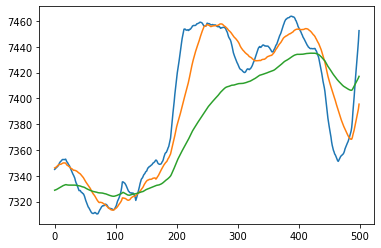

In [13]:
fig = plt.figure()
plt.plot(dataframe_low.SMA_Low[0:500])
plt.plot(dataframe_low.SMA_High[0:500])
plt.plot(dataframe_low.EMA[0:500])
plt.show()

In [14]:
startTimeStamp = dataframe_high.head(1).timestamp.item()
endTimeStamp = dataframe_high.tail(1).timestamp.item()
startTimeStamp,endTimeStamp
dataframe_low = dataframe_low[(dataframe_low.timestamp>=startTimeStamp) 
                              & (endTimeStamp>=dataframe_low.timestamp)]
dataframe_low = dataframe_low.reset_index(drop=True)
dataframe_low

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,...,ignore,SMA_Low,SMA_High,MACD_EMA_Low,MACD_EMA_High,MACD,MACD_Signal,EMA,ATR,EMA_Dev
0,2020-01-08 05:00:00,8343.92,8370.00,8341.79,8367.46,220.284566,1578459899999,1.841392e+06,2238,126.991433,...,0,8313.917727,8341.161273,8322.043466,8298.808062,-23.235404,-25.720423,8129.536842,24.559462,13.522394
1,2020-01-08 05:05:00,8367.57,8377.00,8349.62,8349.63,593.807745,1578460199999,4.968744e+06,2688,308.288824,...,0,8317.047727,8341.586909,8325.427078,8301.027596,-24.399482,-25.310444,8131.839510,24.841515,13.566030
2,2020-01-08 05:10:00,8349.63,8352.45,8335.53,8344.83,201.964015,1578460499999,1.685708e+06,2206,127.412008,...,0,8320.887727,8342.615636,8327.182115,8302.619825,-24.562290,-24.912967,8133.966580,24.049364,13.593118
3,2020-01-08 05:15:00,8345.34,8363.38,8344.46,8355.42,272.685710,1578460799999,2.278570e+06,2163,163.171964,...,0,8325.165909,8343.041636,8329.353235,8304.388759,-24.964476,-24.577882,8136.137559,23.536427,13.595873
4,2020-01-08 05:20:00,8355.43,8361.27,8354.01,8361.27,97.797364,1578461099999,8.173345e+05,1429,72.184158,...,0,8328.455000,8342.396182,8331.843823,8306.303268,-25.540555,-24.316654,8138.345096,21.908785,13.583188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103829,2021-01-03 14:10:00,34048.69,34070.48,33980.44,34048.36,305.252712,1609683299999,1.038270e+07,6019,167.692614,...,0,34102.911818,34098.677818,34077.590773,34088.003737,10.412964,-36.625611,33402.846261,192.122549,51.164788
103830,2021-01-03 14:15:00,34048.35,34111.89,34000.00,34018.13,341.227211,1609683599999,1.162270e+07,6014,191.396651,...,0,34090.470000,34097.811091,34074.721358,34086.453335,11.731978,-30.314922,33409.231796,184.099294,50.000311
103831,2021-01-03 14:20:00,34018.13,34150.00,34018.13,34042.79,338.600072,1609683899999,1.154724e+07,7105,158.557774,...,0,34088.070455,34096.199636,34073.203196,34085.410806,12.207609,-23.666052,33415.679863,178.876365,48.889040
103832,2021-01-03 14:25:00,34042.79,34064.17,33926.96,33926.99,403.285429,1609684199999,1.371424e+07,8839,197.512191,...,0,34077.571818,34093.098364,34065.987918,34082.011402,16.023483,-16.799153,33421.396755,174.709728,47.704594


In [15]:
dataframe_high

,timestamp,open,high,low,close,volume,close_time,asset_volume,trades,buy_base_asset_volume,...,ignore,SMA_Low,SMA_High,MACD_EMA_Low,MACD_EMA_High,MACD,MACD_Signal,EMA,ATR,EMA_Dev
0,2020-01-08 05:00:00,8343.92,8377.00,8312.79,8319.10,1677.474497,1578461399999,1.401637e+07,13435,931.382577,...,0,8205.237727,8011.424000,8205.372047,8029.642141,-175.729906,-154.720683,7643.016997,91.757181,41.625490
1,2020-01-08 05:30:00,8319.11,8360.00,8307.85,8334.77,986.803372,1578463199999,8.222511e+06,9585,401.362183,...,0,8218.741364,8018.747091,8216.246869,8040.384654,-175.862215,-159.552011,7649.856952,87.796463,42.277174
2,2020-01-08 06:00:00,8334.76,8367.61,8320.00,8346.81,904.086030,1578464999999,7.542260e+06,9549,522.657064,...,0,8230.584545,8026.940000,8227.207576,8051.167166,-176.040410,-164.157862,7656.746883,83.777817,42.893683
3,2020-01-08 06:30:00,8346.93,8349.58,8319.00,8339.13,827.857424,1578466799999,6.897744e+06,9030,365.314050,...,0,8242.650000,8034.973091,8236.899091,8061.434767,-175.464324,-168.071156,7663.532088,78.458035,43.468322
4,2020-01-08 07:00:00,8339.14,8347.99,8320.01,8330.68,844.495811,1578468599999,7.037641e+06,9413,437.842795,...,0,8252.770455,8042.896364,8245.382214,8071.185490,-174.196724,-170.827102,7670.207938,73.410231,43.981448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17303,2021-01-03 12:30:00,34293.53,34354.53,33928.75,34103.72,1997.305209,1609678799999,6.813059e+07,40391,918.918794,...,0,33744.101364,32476.400909,33679.366143,32583.939129,-1095.427013,-1112.840214,30232.894603,539.614825,264.127707
17304,2021-01-03 13:00:00,34103.73,34385.02,34100.73,34162.14,1384.629374,1609680599999,4.741955e+07,32238,692.046710,...,0,33806.795909,32559.114909,33723.586913,32641.223625,-1082.363288,-1117.710273,30272.247940,514.082342,266.254301
17305,2021-01-03 13:30:00,34164.10,34193.66,33800.00,33880.00,2989.109002,1609682399999,1.016119e+08,55719,1358.514091,...,0,33858.538182,32633.660727,33748.443703,32690.088495,-1058.355208,-1117.816616,30309.433931,502.040108,267.723317
17306,2021-01-03 14:00:00,33877.98,34150.00,33641.02,33926.99,2550.922734,1609684199999,8.668146e+07,50012,1194.770772,...,0,33916.779545,32710.860727,33761.535338,32733.263817,-1028.271521,-1112.336768,30345.150982,502.734097,268.301797


In [16]:

class Backtest:
    def __init__(self,
                starting_capital,
                algo_stop_balance,
                leverage,
                transaction_fee,
                symbol,
                strategy_class,
                dataframe
                ):
        
        self.starting_capital = starting_capital 
        self.algo_stop_balance = algo_stop_balance 
        
        self.leverage = leverage 
        self.transaction_fee = transaction_fee 
        
        self.symbol = symbol
        self.current_balance = starting_capital
        
        self.balance_alloc = 0
    
        self.order_transaction_fee = 0
        
        self.squareoff_transaction_fee = 0
        
        self.quantity = 0
        self.balance_list = []
        
        self.open_time = None
        self.close_time = None
        
        self.close_reason = ''
        
        
        self.current_price =0
        
        self.trade_count = 0
        self.order_status = OrderStatus.NO_ORDER
        
        self.buy_price = 0
        self.sell_price = 0
        self.pnl = 0
        
        self.square_off_index = 0
    
        self.total_pnl=0
        self.total_returns=0

        self.strategy_class = strategy_class
        self.dataframe = dataframe
        
        self.order_details_cols = [
        'count',
        'open_time',
        'close_time',
        'trade_duration',
        'order_type',
        'balance_prior',
        'balance_post',
        'total_pnl',
        'price_symbol',
        'quantity_symbol',
        'squareOff_price_symbol',
        'order_pnl',
        'pnl_percentage'
        ]
        self.order_details = pd.DataFrame(data=[],columns=self.order_details_cols)
        
    def setCurrent(self,row):
        ## Price of 1st Asset
        self.current_price = row.close
    
    def OrderInit(self,row,order_status):
        ## Increment Trade Count 
        
        self.trade_count = self.trade_count + 1
        self.order_status = order_status
        self.open_time = row.timestamp
        
        if(self.order_status == OrderStatus.LONG):
            self.buy_price = self.current_price
        if(self.order_status == OrderStatus.SHORT):
            self.sell_price = self.current_price
        
    def orderTransactionFee(self,capital):
        self.order_transaction_fee = capital * self.transaction_fee
        return self.order_transaction_fee
        
    def squareOffTransactionFee(self,capital):
        self.squareoff_transaction_fee = capital * self.transaction_fee
        return self.squareoff_transaction_fee
    
    def getQuantity(self,capital,price):
        transactionFee = self.orderTransactionFee(capital)
        self.quantity = ((capital - transactionFee)/price)
        return self.quantity
    
    def getPNL(self,buyPrice,sellPrice,capital):
        transactionFee = self.squareOffTransactionFee(capital)
        self.quantity = self.getQuantity(capital,buyPrice)

        totalSP = sellPrice * self.quantity
        
        self.pnl = (totalSP - capital) - transactionFee
        return self.pnl
        
    def orderSquareOffCalculations(self):
        if(self.order_status == OrderStatus.LONG):
            self.sell_price = self.current_price
        if(self.order_status == OrderStatus.SHORT):
            self.buy_price = self.current_price
        
        self.balance_alloc = self.leverage * self.current_balance
        
        self.pnl = self.getPNL(self.buy_price,self.sell_price,self.balance_alloc)
        return       
    
    def squareOff(self,row,index):
        self.orderSquareOffCalculations()
        self.close_time = row.timestamp
        self.total_pnl = self.total_pnl + self.pnl
        resultant_balance = self.current_balance +  self.pnl
        pnl_percentage = round((self.pnl * 100)/self.current_balance)
        
        trade_duration = pd.to_datetime(self.close_time) - pd.to_datetime(self.open_time)
        
        self.order_details = self.order_details.append(
            pd.DataFrame(
                data=[[
                    self.trade_count,
                    self.open_time,
                    self.close_time,
                    trade_duration,
                    self.order_status,                                  
                    self.current_balance,                                   
                    resultant_balance,                                  
                    self.total_pnl,                                                               
                    self.buy_price,
                    self.quantity,
                    self.sell_price,
                    self.pnl,
                    pnl_percentage
                    ]],
                columns=self.order_details_cols),ignore_index=True)
        self.current_balance = resultant_balance
        self.balance_list.append(self.current_balance)
        self.strategy_class.order_status = OrderStatus.NO_ORDER
        self.order_status = OrderStatus.NO_ORDER 
       
       
    def summarize(self):
        
        tested_from = self.dataframe.iloc[0].timestamp
        tested_to = self.dataframe.iloc[-1].timestamp
        
        test_duration = pd.to_datetime(tested_to) - pd.to_datetime(tested_from)
        
        average_trade_duration = (self.order_details.trade_duration).mean()
        
        cap_returns = ((self.current_balance - self.starting_capital) *100/self.starting_capital)
        
        max_loss = self.order_details.pnl_percentage.min()
        max_profit = self.order_details.pnl_percentage.max()
        
        total_trades = self.order_details.shape[0]
        
    
        loss_trades = self.order_details[(self.order_details.pnl_percentage < 0)]
        profit_trades = self.order_details[(self.order_details.pnl_percentage > 0)]
        
        average_pnl_trade = self.order_details.pnl_percentage.mean()
        average_pnl_loss_trades = loss_trades.pnl_percentage.mean()
        average_pnl_profit_trades = profit_trades.pnl_percentage.mean()
        
        n_loss_trades = loss_trades.shape[0]
        n_profit_trades = profit_trades.shape[0]
        
        profit_trades_percentage = round((n_profit_trades * 100)/total_trades)
        
        
        
        summary  =  pd.DataFrame(data={
            "tested_from" :tested_from,
            "tested_to":tested_to,
            "test_duration":test_duration,
            "average_trade_duration":average_trade_duration,
            "cap_returns" : cap_returns,
            "max_loss" : max_loss,
            "max_profit" : max_profit,
            "total_trades":total_trades,
            "n_loss_trades":n_loss_trades,
            "n_profit_trades":n_profit_trades,
            "profit_trades_percentage":profit_trades_percentage,
            "average_pnl_trade":average_pnl_trade,
            "average_pnl_loss_trades":average_pnl_loss_trades,
            "average_pnl_profit_trades":average_pnl_profit_trades
        },index=[0])
        
        return summary
    def runBacktest(self):
        
        for index,row in self.dataframe.iterrows():            
            self.setCurrent(row)
            if self.current_balance > self.algo_stop_balance:
                if(self.strategy_class.longOrderCondition(row)):
                    self.OrderInit(row,OrderStatus.LONG)
                if(self.strategy_class.shortOrderCondition(row)):
                    self.OrderInit(row,OrderStatus.SHORT)
                if(self.strategy_class.squareOffCondition(row)):
                    self.squareOff(row,index)
        
        summary = self.summarize()
        print(summary.iloc[0])
        
        return self.current_balance,self.balance_list,self.order_details

In [17]:

class SMAStrategy:
    def __init__(self,dataframe_high,dataframe_low):
        self.dataframe_high = dataframe_high
        self.dataframe_low = dataframe_low
        
        self.ema_dev_threshold = 5
        
        self.stop_loss = 0
        self.high_tf_row = dataframe_high.loc[0]
        
        self.order_status = OrderStatus.NO_ORDER
        self.crossunder = 0
        self.crossover = 0
    
    def crossOver(self,ticker_row):
        if(ticker_row.MACD >= ticker_row.MACD_Signal):
        #         if(ticker_row.SMA_Low >= ticker_row.SMA_High):
            self.crossover = 1
            self.crossunder = 0
            return True
        else:
            return False
    def crossUnder(self,ticker_row):
        if(ticker_row.SMA_Low <= ticker_row.SMA_High):
            self.crossunder = 1
            self.crossover = 0
            return True
        else:
            return False
        
    def set_squareOffCondition(self,ticker_row):
        
        #stop_loss_delta = (ticker_row.close * 0.02) + ticker_row.ATR
        stop_loss_delta = 4 * ticker_row.ATR
        if(self.order_status == OrderStatus.LONG):
            self.stop_loss = ticker_row.close - stop_loss_delta
        elif(self.order_status == OrderStatus.SHORT):
            self.stop_loss = ticker_row.close + stop_loss_delta
        
            
    def longOrderCondition(self,ticker_row):
        condition = False
        current_price = ticker_row.close
        if(self.order_status != OrderStatus.NO_ORDER):
            condition = False
        elif(self.crossOver(ticker_row)):
            self.high_tf_row = self.dataframe_high[
                (self.dataframe_high.timestamp <= ticker_row.timestamp)
            ].iloc[-1]
            
            if((current_price > self.high_tf_row.EMA) 
              and 
               (ticker_row.EMA_Dev >self.ema_dev_threshold)
              ):
                self.order_status = OrderStatus.LONG
                self.set_squareOffCondition(ticker_row)
                condition = True
        
        return condition
    
    def shortOrderCondition(self,ticker_row):
        return False
    
    def longSquareOffCondition(self,ticker_row):
        current_price = ticker_row.close
        condition = False
        if(current_price <= self.stop_loss):
            self.crossover = 0
            self.crossunder = 0
            condition = True
        elif(self.crossunder == 0):
            if(self.crossUnder(ticker_row)):
                self.set_squareOffCondition(ticker_row)
        elif(self.crossover == 0):
            if(self.crossOver(ticker_row)):
                self.set_squareOffCondition(ticker_row)
        
        return condition
            
    def shortSquareOffCondition(self,ticker_row):
        current_price = ticker_row.close
        if(current_price >= self.stop_loss):
            return True
#         else:
#             return self.crossOver(ticker_row)
        
    def squareOffCondition(self,ticker_row):
        
        if(self.order_status == OrderStatus.LONG):
            return self.longSquareOffCondition(ticker_row)
        elif(self.order_status == OrderStatus.SHORT):
            return self.shortSquareOffCondition(ticker_row)
        else:
            return False
        

In [ ]:
sma_strategy = SMAStrategy(dataframe_high,dataframe_low)

back = Backtest(
    10000,
    1000,
    3,
    0.075/100,
    'BTCUSDT',
    sma_strategy,
    dataframe_low)
current_balance,balance_list,order_details = back.runBacktest()
# cap_returns = round((current_balance -starting_capital) *100/current_balance)

fig = plt.figure()
# plt.plot(dataframe_low.loc[0:10000].close)
plt.plot(balance_list)
plt.show()
order_details
order_details.to_csv('./data/SMA/OrderDetails.csv',index=False)
# balance_list

In [ ]:
cap_returns = ((current_balance -10000) *100/10000)
cap_returns

In [ ]:
order_details.iloc[0].close_time

In [ ]:
len_p = 1000
fig = plt.figure(figsize=(16,8))
# plt.plot(dataframe_low.SMA_Low[0:len_p])
# plt.plot(dataframe_low.SMA_High[0:len_p])
# plt.plot(dataframe_low.EMA[0:len_p])

plt.plot(dataframe_low.MACD[0:len_p])
plt.plot(dataframe_low.MACD_Signal[0:len_p])
plt.show()

In [ ]:
plt.plot(dataframe_low.EMA_Dev[0:len_p])

In [ ]:
max_loss = order_details.pnl_percentage.min()
max_profit = order_details.pnl_percentage.max()

In [ ]:
plt.figure(figsize=(16,8))
plt.axhline(0,c="black")
# plt.axhline(max_loss,c="salmon")
# plt.axhline(max_profit,c="salmon")
# plt.text(y=max_loss, x=0, s=('Max Loss : ' + str(max_loss)))
# plt.text(y=max_profit, x=0, s=('Max Profit : ' + str(max_profit)))
plt.plot(order_details.pnl_percentage)
plt.stem(order_details.pnl_percentage,use_line_collection=True)

In [ ]:
order_details[(order_details.pnl_percentage < 0)].shape[0]

In [ ]:
order_details[(order_details.pnl_percentage > 0)].shape[0]

In [ ]:
df = dataframe_low
df['timestamp'] = pd.to_datetime(df.timestamp)
df  = df.set_index('timestamp')

df
# plt.figure(figsize = (16,8))
# plt.plot(dataframe_low.close)